In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm
import random

# Read CSV file
df = pd.read_csv('final_matched_quarter_traffic.csv')

# Calculate total traffic flow (sum of all vehicle types)
df["total_traffic"] = df.iloc[:, 2:10].sum(axis=1)

# Select the required columns
traffic_data = df[["local_authority_name", "year_quarter", "total_traffic"]]

# Convert quarterly columns to a time format for easy sorting
traffic_data["year_quarter"] = pd.to_datetime(traffic_data["year_quarter"].str[:4] + 
                                              "-" + 
                                              (traffic_data["year_quarter"].str[5:].astype(int) * 3 - 2).astype(str) + 
                                              "-01")

# Sort by time
traffic_data = traffic_data.sort_values(by=["year_quarter"])

lad = traffic_data['local_authority_name']
lad = set(lad)
lad_random = random.sample(lad, int(len(lad)*0.1))
traffic_data = traffic_data[traffic_data['local_authority_name'].isin(lad_random)]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21308\1136377089.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data["year_quarter"] = pd.to_datetime(traffic_data["year_quarter"].str[:4] +
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21308\1136377089.py:29: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  lad_random = random.sample(lad, int(len(lad)*0.1))


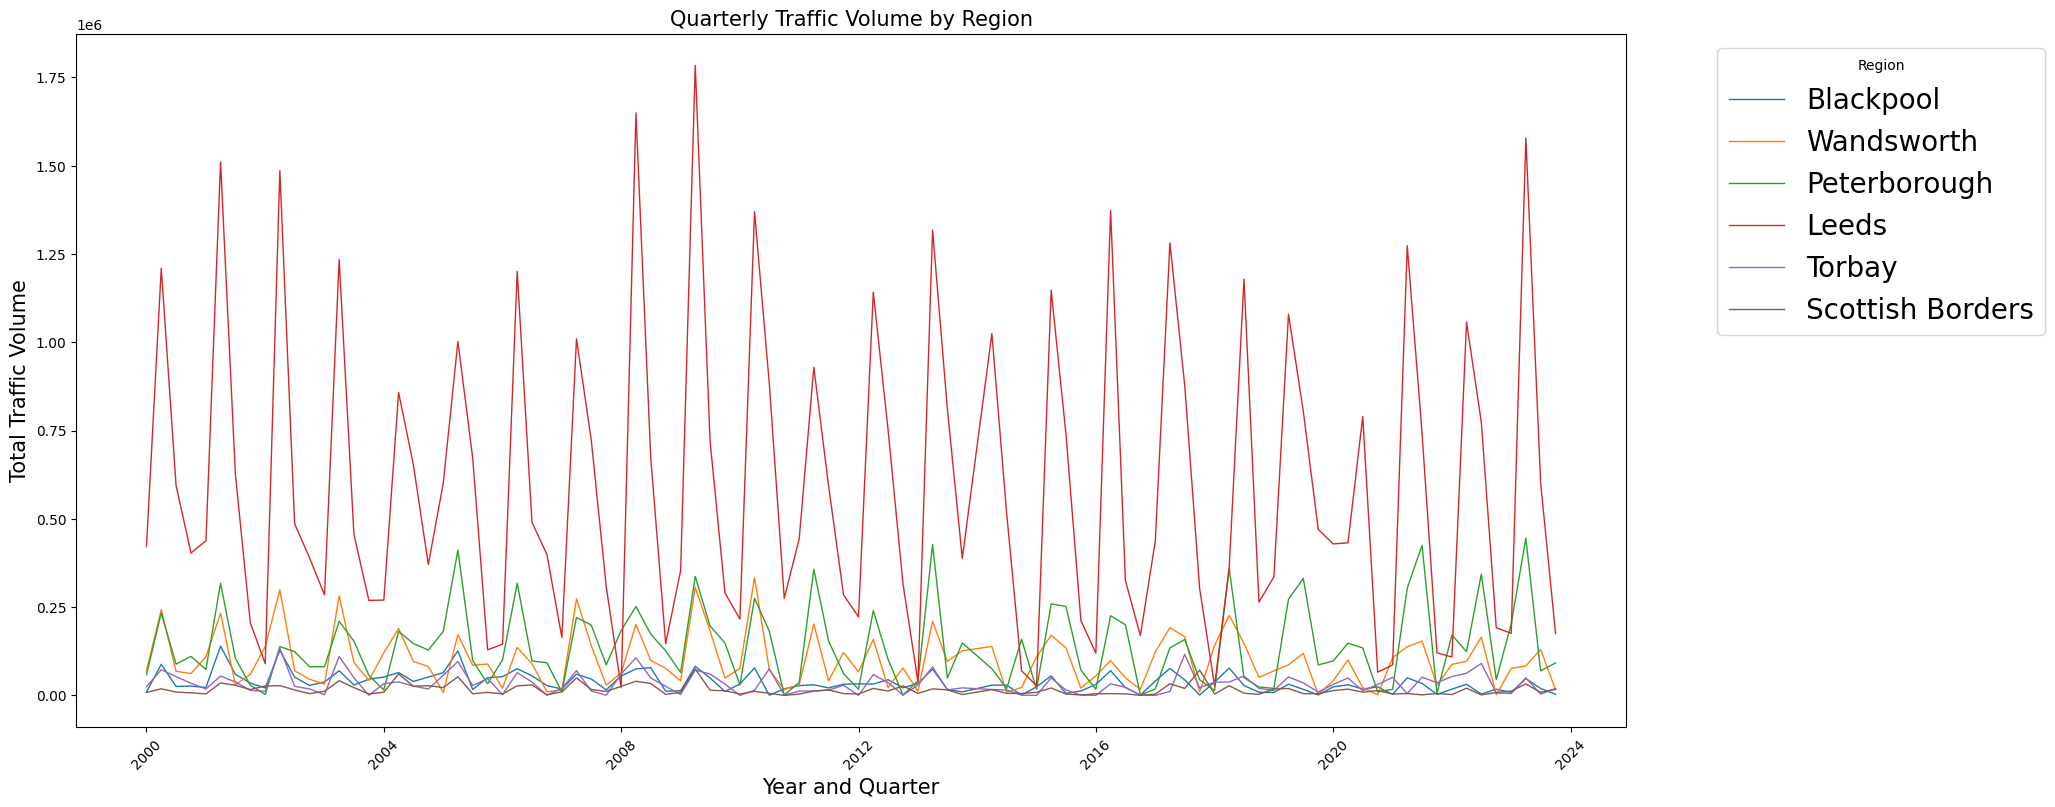

In [ ]:
# Plot lineplot
plt.figure(figsize=(20, 9))
sns.lineplot(data=traffic_data, x="year_quarter", y="total_traffic", hue="local_authority_name", linewidth=1)

# Set up title and label
plt.title("Quarterly Traffic Volume by Region", fontsize=15)
plt.xlabel("Year and Quarter", fontsize=15)
plt.ylabel("Total Traffic Volume", fontsize=15)
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

# Display the plot
plt.show()

Seasonal Index:
 quarter
1    0.482281
2    1.945139
3    1.033947
4    0.538633
Name: total_traffic, dtype: float64


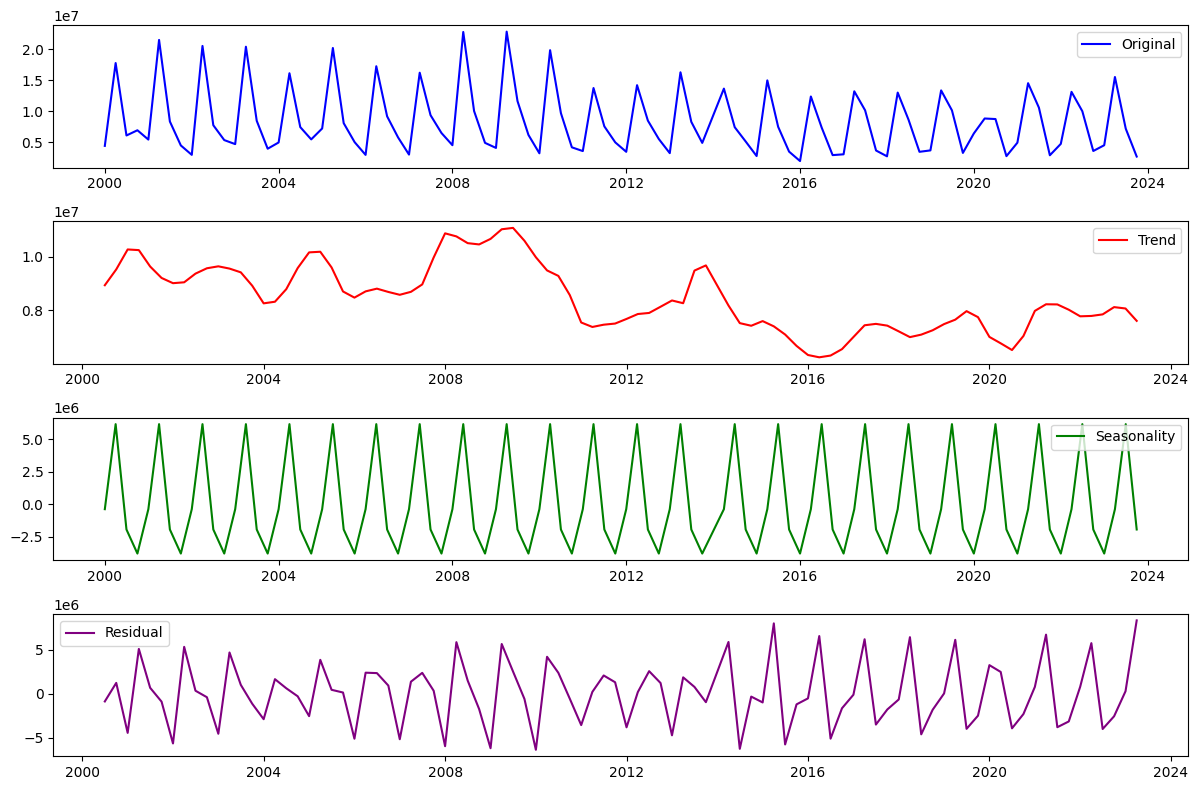

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Read data
file_path = "final_matched_quarter_traffic.csv"
df = pd.read_csv(file_path)

# calculate total traffic flow
df["total_traffic"] = df.iloc[:, 2:10].sum(axis=1)

# Convert quarterly columns to time format and create a time index
df["year_quarter"] = pd.to_datetime(df["year_quarter"].str[:4] + 
                                    "-" + 
                                    (df["year_quarter"].str[5:].astype(int) * 3 - 2).astype(str) + 
                                    "-01")

# Aggregate total traffic across all regions on a quarterly basis
traffic_summary = df.groupby("year_quarter")["total_traffic"].sum().reset_index()

# Set up a time index
traffic_summary.set_index("year_quarter", inplace=True)

# Method 1: Calculate the seasonal index
# Average traffic is calculated on a quarterly basis
traffic_summary["quarter"] = traffic_summary.index.quarter
quarterly_means = traffic_summary.groupby("quarter")["total_traffic"].mean()

# Calculate the seasonality index
seasonal_index = quarterly_means / quarterly_means.mean()
print("Seasonal Index:\n", seasonal_index)

# Method 2: Time series decomposition
# Perform seasonal decomposition (using additive models)
decomposition = seasonal_decompose(traffic_summary["total_traffic"], model='additive', period=4)

# Plot the decomposition results
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(traffic_summary["total_traffic"], label="Original", color="blue")
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label="Trend", color="red")
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonality", color="green")
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label="Residual", color="purple")
plt.legend()

plt.tight_layout()
plt.show()